In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
df=pd.read_csv("C:\\Users\\piyus.LAPTOP-7O04196B\\Downloads\\instahyre\\dataset\\final_table.csv")
df.drop("Unnamed: 0",axis=1,inplace=True)
df.drop_duplicates(inplace=True)
df.head()

,designation,company_name,Number_of_Employees,job_description,skills,Years_of_Experience,Category,company_class,Department
0,Business Development Associate (Drive),MakeMyTrip,1000,Function: Sales and Business → Sales / Busines...,Business Development\nRevenue Management\nSales,4,Junior,Class1,Sales and Business
1,Business Manager (Drive),MakeMyTrip,1000,Function: Sales and Business → Sales / Busines...,Business Development\nChannel Sales\nKey Accou...,6,Senior,Class1,Sales and Business
3,Key Account Manager (Drive),MakeMyTrip,1000,Function: Sales and Business → Sales / Busines...,Corporate Sales\nKey Account Management\nProfi...,7,Senior,Class1,Sales and Business
4,Senior Business Development Manager (Drive),MakeMyTrip,1000,Function: Sales and Business → Sales / Busines...,Business Development\nCorporate Sales\nKey Acc...,5,Senior,Class1,Sales and Business
5,Core Java Developer (Drive),Publicis Sapient,1000,Function: Software Engineering → Backend Devel...,AWS\nAzure\nGoogle Cloud\nJava\nKafka\nKibana\...,6,Senior,Class1,Software Engineering


In [40]:
df =df[["skills","Years_of_Experience","Category"]]

In [41]:
df['new_sen']=np.where(df["Years_of_Experience"]<=5,'junior',np.where((df['Years_of_Experience']>5) & (df['Years_of_Experience']<=8),'Mid Senior','Senior'))

In [42]:
df.new_sen.value_counts()

Senior        175
Mid Senior    164
junior        116
Name: new_sen, dtype: int64

In [43]:
df["Category"].value_counts()

Lead          231
Senior        157
Junior         36
Fresher        26
Specialist      5
Name: Category, dtype: int64

In [47]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
pc=PorterStemmer()

In [48]:
# text normilization
def transfrom_text(x):
    y = nltk.word_tokenize(x.lower())
    z = []
    for i in y:
        if i.isalnum():
            z.append(i)
    y = z[:]
    z.clear()
    for i in y:
        if i not in stopwords.words('english'):
            z.append(i)
    y=z[:]
    z.clear()
    for i in y:
        z.append(pc.stem(i))
    return ' '.join(z)

In [49]:
df['transfrom_skill']=df.skills.map(transfrom_text)

In [50]:
df.head(1)

,skills,Years_of_Experience,Category,new_sen,transfrom_skill
0,Business Development\nRevenue Management\nSales,4,Junior,junior,busi develop revenu manag sale


In [51]:
df.Category.value_counts()

Lead          231
Senior        157
Junior         36
Fresher        26
Specialist      5
Name: Category, dtype: int64

In [52]:
df["Category"] = df["Category"].replace({"Fresher":1,"Junior":1,"Senior":2,"Lead":3,"Specialist":4})

In [53]:
#df["new_sen"] = df["new_sen"].replace({"junior":1,"Mid Senior":2,"Senior":3})

In [ ]:
# to deal with the text data and convert it into machine understandable form to build the model

In [54]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import tree
from sklearn.tree import plot_tree, DecisionTreeClassifier
from sklearn import metrics, linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [55]:
cv_1=CountVectorizer()

In [56]:
x=cv_1.fit_transform(df.transfrom_skill)
y=df.Category

In [57]:
# train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=15)

In [58]:
models = {
    "Logistic Regression": LogisticRegression(multi_class='multinomial',random_state=11),
    "Random Forest": RandomForestClassifier(random_state=11),
    "Descision Tree": DecisionTreeClassifier(criterion='gini', random_state=11)
}

Logistic Regression : 53.62%

              precision    recall  f1-score   support

           1       0.80      0.44      0.57         9
           2       0.53      0.27      0.36        30
           3       0.51      0.83      0.63        30

    accuracy                           0.54        69
   macro avg       0.61      0.51      0.52        69
weighted avg       0.56      0.54      0.50        69




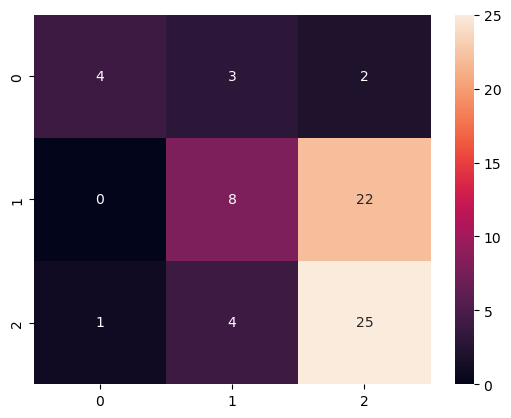

Random Forest : 55.07%

              precision    recall  f1-score   support

           1       0.60      0.67      0.63         9
           2       0.64      0.23      0.34        30
           3       0.52      0.83      0.64        30

    accuracy                           0.55        69
   macro avg       0.59      0.58      0.54        69
weighted avg       0.58      0.55      0.51        69




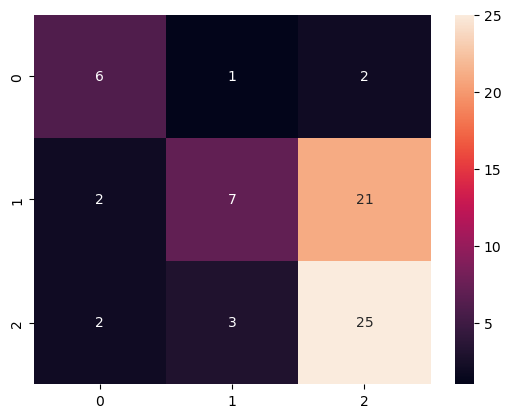

Descision Tree : 55.07%

              precision    recall  f1-score   support

           1       0.55      0.67      0.60         9
           2       0.67      0.27      0.38        30
           3       0.52      0.80      0.63        30

    accuracy                           0.55        69
   macro avg       0.58      0.58      0.54        69
weighted avg       0.59      0.55      0.52        69




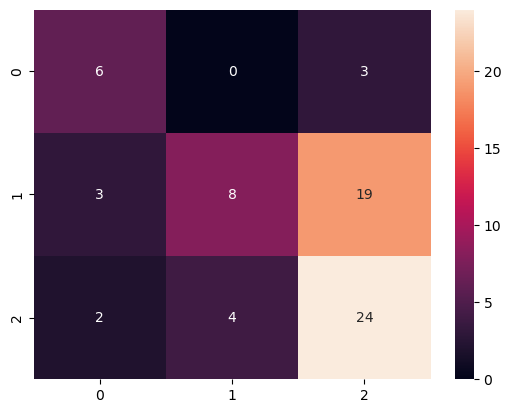

In [59]:
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(name + " : {:.2f}%".format(metrics.accuracy_score(y_test, y_pred)*100))
    print()
    print(metrics.classification_report(y_test, y_pred))
    print()
    sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot=True)
    plt.show()

In [60]:
# model 
model_1=RandomForestClassifier(random_state=11)
model_1.fit(x_train,y_train)

RandomForestClassifier(random_state=11)

In [61]:
y_pred=model_1.predict(x_test)
print(metrics.accuracy_score(y_test,y_pred))

0.5507246376811594


In [62]:
def pred_1(x):
    pred = model_1.predict(cv_1.transform([transfrom_text(x)]))
    if pred==1:
        return "Fresher"
    elif pred==2: 
        return "Senior"
    elif pred==3:
        return "Lead"
    elif pred==4:
        return "Specialist"
    else:
        return "Other"

In [63]:
print(pred_1('Java,MariaDB,Spring Boot,J2EE,MySQL'))

Lead


In [64]:
import pickle

In [65]:
pickle.dump(model_1,open('model_1.pkl','wb'))
pickle.dump(cv_1,open('vectorizer_1.pkl','wb'))